<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% /></center>

## **<center>Dimensionality Reduction Using PCA</center>**

---
# **Table of Contents**
---

**1.** [**Introduction to Principal Component Analysis**](#Section1)<br>
  - **1.1** [**What is Data Dimensionality**](#Section11)<br>
  - **1.2** [**The Curse of Dimensionality**](#Section12)<br>
  - **1.3** [**Principal Component Analysis**](#Section13)<br>
  - **1.4** [**Advantages and Disadvantages of PCA**](#Section14)<br>

**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Processing**](#Section5)<br>
  - **5.1** [**Checking for Missing Data**](#Section51)
  - **5.2** [**Data Cleaning**](#Section52)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post Processing**](#Section7)<br>
  - **7.1** [**Feature Scaling**](#Section71)
  - **7.2** [**Data Splitting**](#Section72)

**8.** [**Model Development and Evaluation**](#Section8)<br>
  - **8.1** [**Model Development & Evaluation without PCA**](#Section81)<br>
  - **8.2** [**Dimensionality Reduction using PCA**](#Section82)<br>
  - **8.3** [**Model Development & Evaluation with PCA**](#Section83)<br>
  - **8.4** [**Difference between the models**](#Section84)<br>

**9.** [**Conclusion**](#Section9)

---
<a name = Section1></a>
# **1. Introduction**
---





<a name = Section11></a>
###  **1.1 What is Data Dimensionality?**

- In the real world, the **number of columns** is the **number of dimensions** of data.

<center><img src="https://drek4537l1klr.cloudfront.net/rhys/Figures/fig13-1_alt.jpg"></center>

- However, some columns are **similar**, some are **correlated**, some are **duplicates** in some way, some are **junk**, some are **useless**, etc.

- So, the **actual** number of **dimensions** can be **unknown** and it is called a **knotty problem**.

<a name = Section12></a>
### **1.2 The Curse of Dimensionality**

- The curse of dimensionality refers to various phenomena that arise when **analyzing** and **organizing** **data** in **high-dimensional spaces**.

- They **do not occur** in **low-dimensional settings** such as the three-dimensional physical space of everyday experience.

- Often a time we deal with too many features resulting in **unnecessary storage space** and the **processing time** for a particular algorithm.

- If there are **more features than observations**, then we run the **overfitting risk** of  our model resulting in **terrible performance**.

- For example:

  - Compare **finding a ball** in a **100m straight path (1-D space)** vs finding a ball in a **100m x 100m square field (2-D space)**.

  - It gets **tough** to find the ball in the square field than in the straight path.

  - Now imagine searching for the ball in an **entire campus with lots of buildings (3-D space)**.

  - It would be almost impossible to search the ball in higher dimensions.

<br>
<center><img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780128021217000467-gr35-1b.jpg" width="" height="" /></center>

<a name = Section13></a>
### **1.3 Principal Component Analysis**

- It is the process of **computing** the **principal components** and using them to **perform a change** of basis on the data.

- Sometimes we use only the **first few principal components** and ignoring the rest.

- They help in **overcome** the problem of **overfitting** in **higher dimensions** and **handle** the **curse** of dimensionality very well.

- PCA is a method used for **compressing** a **huge** amount of **data** into something that **captures** the **essence** of the **original data**.

- It reduces the dimension of your data intending to **retain** as **much** **information** as possible.

- This method **combines** highly **correlated** variables to form a **smaller** number of an **artificial set of variables**.

- These artificial sets of variables are called '**principal components**' that account for the **most variance in the data**.

- For a quick and basic explanation about the working of PCA click <a href="http://www.youtube.com/watch?feature=player_embedded&v=BfTMmoDFXyE">**here**</a> to watch the video and check the animation as well:<br>

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/Q7HIP.gif"></center>

<a name = Section14></a>
### **1.4 Advantages and Disadvantages of PCA**

|No.|Advantages|Disadvantages
|:--:|:--:|:--:|
|1|**Removes Correlated Features**|**Independent variables become less interpretable**|
|2|**Improves Algorithm Performance**|**Data standardization is must before PCA**|
|3|**Reduces Overfitting**|**Information Loss**|
|4|**Improves Visualization**|**Relies on linear asumptions**|

---
<a name = Section2></a>
# **2. Problem Statement**
---

- According to Epsilon's research, **80% of customers** are more **likely** to do business with you if you provide **personalized service**.

- The **digitization** of everyday lives means that customers expect services to be delivered in a personalized and timely manner.

- **Santander Group** aims to recognize that there is a need to **provide** a **customer** a financial service.

- They intend to determine the **amount** and **value** of the customer's **transaction**.

- This means **anticipating** customer **needs** in a more concrete, but also **simple** and **personal** way.

<center><img width=65% src="https://images.ctfassets.net/3viuren4us1n/60dMABV8cLyUAlwyHdT3SY/ef5a44a5a95c4d280f31a6b4e0fba218/Personalized-Customer-Service.jpg"></center>

- Santander Group is asking **you**, their data scientist, to help them **identify** the value of **transactions** for each **potential customer**.

- This is the first step that they need to nail in order to personalize their services at scale.

- You are provided with an **anonymized dataset** containing **numeric features**, a **numeric target feature**, and a **string ID feature**.

- Every **column** represents a **unique** **category** of transactions and is kept anonymized.

- These transactions can be **shopping**, **bills**, **loan payment**, **subscriptions**, etc.

- The task is to **predict** the value of the **target feature** in the test set.


---
<a name = Section3></a>
# **3. Importing Libraries**
---

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
import plotly.graph_objs as go                                      # Importing plotly for interactive visualizations
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features in the dataset
from sklearn.model_selection import train_test_split                # To properly split the dataset into train and test sets
from sklearn.ensemble import RandomForestRegressor                  # To create a random forest regressor model
from sklearn.linear_model import LinearRegression                   # To create a linear regression model
from sklearn import metrics                                         # Importing to evaluate the model used for regression
from sklearn.decomposition import PCA                               # Importing to create an instance of PCA model
#-------------------------------------------------------------------------------------------------------------------------------
from random import randint                                          # Importing to generate random integers
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # For time functionality
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


In [2]:
value = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/insaid2018/pca-file/master/train.csv")
print('Shape of the dataset:', value.shape)
value.head()

Shape of the dataset: (4459, 4993)


ID         target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  \
0  000d6aaf2 38000000.00000    0.00000          0    0.00000          0   
1  000fbd867   600000.00000    0.00000          0    0.00000          0   
2  0027d6b71 10000000.00000    0.00000          0    0.00000          0   
3  0028cbf45  2000000.00000    0.00000          0    0.00000          0   
4  002a68644 14400000.00000    0.00000          0    0.00000          0   

   2f0771a37  30347e683  d08d1fbe3  6ee66e115     20aa07010  dc5a8f1d8  \
0          0          0          0          0       0.00000    0.00000   
1          0          0          0          0 2200000.00000    0.00000   
2          0          0          0          0       0.00000    0.00000   
3          0          0          0          0       0.00000    0.00000   
4          0          0          0          0 2000000.00000    0.00000   

   11d86fa6a  77c9823f2  8d6c2a0b2  4681de4fd  adf119b9a  cff75dd09  \
0    0.00000          0          0          0          0    0.00000   
1    0.00000          0          0          0          0    0.00000   
2    0.00000          0          0          0          0    0.00000   
3    0.00000          0          0          0          0    0.00000   
4    0.00000          0          0          0          0    0.00000   

   96f83a237  b8a716ebf  6c7a4567c  4fcfd2b4d  f3b9c0b95  71cebf11c  \
0          0    0.00000          0          0    0.00000          0   
1          0    0.00000          0          0    0.00000          0   
2          0    0.00000          0          0    0.00000          0   
3          0    0.00000          0          0    0.00000          0   
4          0    0.00000          0          0    0.00000          0   

   d966ac62c  68b647452  c88d108c9  ff7b471cd  d5308d8bc  0d866c3d7  \
0          0    0.00000          0          0          0    0.00000   
1          0    0.00000          0          0          0    0.00000   
2          0    0.00000          0          0          0    0.00000   
3          0    0.00000          0          0          0    0.00000   
4          0    0.00000          0          0          0    0.00000   

   bc3f77679  bd8f989f1  0eff5bf95  22ed6dba3  92b13ebba  c330f1a67  \
0          0    0.00000          0    0.00000    0.00000          0   
1          0    0.00000          0    0.00000    0.00000          0   
2          0    0.00000          0    0.00000    0.00000          0   
3          0    0.00000          0    0.00000    0.00000          0   
4          0    0.00000          0    0.00000    0.00000          0   

   233c7c17c  2cb4d123e  eeac16933     87ffda550  822e49b95  316b978cd  \
0    0.00000          0          0 1300000.00000    0.00000          0   
1    0.00000          0          0       0.00000    0.00000          0   
2    0.00000          0          0       0.00000    0.00000          0   
3    0.00000          0          0       0.00000    0.00000          0   
4    0.00000          0          0       0.00000    0.00000          0   

   d04e16aed  5d5c5ce6d  ec863cb52  11ad148bd  ea18d720e  408d86ce9  \
0    0.00000          0          0    0.00000    0.00000    0.00000   
1    0.00000          0          0    0.00000    0.00000    0.00000   
2    0.00000          0          0    0.00000    0.00000    0.00000   
3    0.00000          0          0    0.00000    0.00000    0.00000   
4    0.00000          0          0    0.00000    0.00000    0.00000   

   69d8b4020  b0868a049  80b14398e  ecdef52b2  c36bcacc5  151d318cd  \
0          0          0    0.00000    0.00000          0          0   
1          0          0    0.00000    0.00000          0          0   
2          0          0    0.00000    0.00000          0          0   
3          0          0    0.00000    0.00000          0          0   
4          0          0    0.00000    0.00000          0          0   

   ab0cddb90  2d6bd8275      dfdf4b580  c87722678  a8c320153  7df8788e8  \
0          0    0.00000        0

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [3]:
value.describe()

target      48df886f9     0deb4b6a8      34b15f335  \
count     4459.00000     4459.00000    4459.00000     4459.00000   
mean   5944923.32204    14654.93010    1390.89482    26722.45092   
std    8234311.50163   389329.80935   64283.02450   569965.18305   
min      30000.00000        0.00000       0.00000        0.00000   
25%     600000.00000        0.00000       0.00000        0.00000   
50%    2260000.00000        0.00000       0.00000        0.00000   
75%    8000000.00000        0.00000       0.00000        0.00000   
max   40000000.00000 20000000.00000 4000000.00000 20000000.00000   

           a8cb14b00       2f0771a37      30347e683      d08d1fbe3  \
count     4459.00000      4459.00000     4459.00000     4459.00000   
mean      4530.16371     26409.95739    30708.10585    16865.21642   
std     235912.40680   1514730.15145   577058.97492   751275.59447   
min          0.00000         0.00000        0.00000        0.00000   
25%          0.00000         0.00000        0.00000        0.00000   
50%          0.00000         0.00000        0.00000        0.00000   
75%          0.00000         0.00000        0.00000        0.00000   
max   14800000.00000 100000000.00000 20708000.00000 40000000.00000   

           6ee66e115       20aa07010      dc5a8f1d8       11d86fa6a  \
count     4459.00000      4459.00000     4459.00000      4459.00000   
mean      4669.20834   2569407.36837   155215.83838    195049.99782   
std     187944.88843   9610183.07315  1587814.70602   2397372.08892   
min          0.00000         0.00000        0.00000         0.00000   
25%          0.00000         0.00000        0.00000         0.00000   
50%          0.00000         0.00000        0.00000         0.00000   
75%          0.00000    600000.00000        0.00000         0.00000   
max   10400000.00000 319612000.00000 60000000.00000 100000000.00000   

        77c9823f2     8d6c2a0b2       4681de4fd      adf119b9a      cff75dd09  \
count  4459.00000    4459.00000      4459.00000     4459.00000     4459.00000   
mean      8.52209    3595.87351   2258014.80153   268084.32384    45882.54915   
std     569.06891  124543.50180  15522980.13471  3026909.73663   814067.35576   
min       0.00000       0.00000         0.00000        0.00000        0.00000   
25%       0.00000       0.00000         0.00000        0.00000        0.00000   
50%       0.00000       0.00000         0.00000        0.00000        0.00000   
75%       0.00000       0.00000         0.00000        0.00000        0.00000   
max   38000.00000 6000000.00000 356000000.00000 66000000.00000 31110000.00000   

           96f83a237       b8a716ebf      6c7a4567c     4fcfd2b4d  \
count     4459.00000      4459.00000     4459.00000    4459.00000   
mean     44514.77910    396896.08851    28831.29491    1940.79390   
std    1354504.11192   3238242.60292   570538.76291   27860.22429   
min          0.00000         0.00000        0.00000       0.00000   
25%          0.00000         0.00000        0.00000       0.00000   
50%          0.00000         0.00000        0.00000       0.00000   
75%          0.00000         0.00000        0.00000       0.00000   
max   79600000.00000 100000000.00000 21730000.00000 1100000.00000   

            f3b9c0b95       71cebf11c      d966ac62c      68b647452  \
count      4459.00000      4459.00000     4459.00000     4459.00000   
mean     448384.09210     79897.28639   154839.42588   112825.35951   
std     6370643.86186   2846439.89794  2425793.87231  1161274.58848   
min           0.00000         0.00000        0.00000        0.00000   
25%           0.00000         0.00000        0.00000        0.00000   
50%           0.00000         0.00000        0.00000        0.00000   
75%           0.00000         0.00000        0.00000        0.00000   
max   200000000.00000 153672000.00000 60000000.00000 37200000.00000   

            c88d108c9     ff7b471cd  d5308d8bc      0d866c3d7       bc3f77679  \
count      4459.00000    4459.00000 4459.00000     4459.0

**Observations**:

- We are provided with an __anonymized dataset__.

- The dataset contains __4459 observations__ and __4993 columns__.

- The **target** feature is **numeric** and have an average value of **5944923** units.

- It **ranges** from **300000** units all the way upto **40000000** units.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [4]:
value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


**Observations**:

- The dataset has **4459** rows, and **4993** features.

- **Out of 4993** features present, **1845** are of **float64** datatype, including our target feature.

- **3147** features have **int64** datatype.

- Only **1 feature** has **object** datatype which is our **ID** as seen in the sample of the dataset.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

- We **can't use pandas profiling** on such a large dataset as it will throw **memory error**.

<a name = Section51></a>
### **5.1 Checking for Missing Data**

- In this section, we will **identify missing data** and take appropriate measures if **necessary**.

In [5]:
value.isnull().sum().any()

False

- There are **no missing values** present in the dataset.

<a name = Section52></a>
### **5.2 Data Cleaning**

- In this section, we will **remove** columns which are **redundant** for model.

- We will first remove the **ID** column then remove the columns with **standard deviation = 0** from the dataset.

- Standard Deviation = 0 means that **every data point in a column is equal to its mean**.

- Also means that all of a column's values are **identical** and such columns do **not help** us in **prediction** so we will drop them.

In [6]:
value = value.drop('ID', axis = 1)

drop_cols=[]

for cols in value.columns:
    if value[cols].std() == 0:
        drop_cols.append(cols)

print("Number of constant columns to be dropped: ", len(drop_cols))
print(drop_cols)
value.drop(drop_cols, axis=1, inplace=True)

value.head()

Number of constant columns to be dropped:  256
['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '99

target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  2f0771a37  \
0 38000000.00000    0.00000          0    0.00000          0          0   
1   600000.00000    0.00000          0    0.00000          0          0   
2 10000000.00000    0.00000          0    0.00000          0          0   
3  2000000.00000    0.00000          0    0.00000          0          0   
4 14400000.00000    0.00000          0    0.00000          0          0   

   30347e683  d08d1fbe3  6ee66e115     20aa07010  dc5a8f1d8  11d86fa6a  \
0          0          0          0       0.00000    0.00000    0.00000   
1          0          0          0 2200000.00000    0.00000    0.00000   
2          0          0          0       0.00000    0.00000    0.00000   
3          0          0          0       0.00000    0.00000    0.00000   
4          0          0          0 2000000.00000    0.00000    0.00000   

   77c9823f2  8d6c2a0b2  4681de4fd  adf119b9a  cff75dd09  96f83a237  \
0          0          0          0          0    0.00000          0   
1          0          0          0          0    0.00000          0   
2          0          0          0          0    0.00000          0   
3          0          0          0          0    0.00000          0   
4          0          0          0          0    0.00000          0   

   b8a716ebf  6c7a4567c  4fcfd2b4d  f3b9c0b95  71cebf11c  d966ac62c  \
0    0.00000          0          0    0.00000          0          0   
1    0.00000          0          0    0.00000          0          0   
2    0.00000          0          0    0.00000          0          0   
3    0.00000          0          0    0.00000          0          0   
4    0.00000          0          0    0.00000          0          0   

   68b647452  c88d108c9  ff7b471cd  0d866c3d7  bc3f77679  bd8f989f1  \
0    0.00000          0          0    0.00000          0    0.00000   
1    0.00000          0          0    0.00000          0    0.00000   
2    0.00000          0          0    0.00000          0    0.00000   
3    0.00000          0          0    0.00000          0    0.00000   
4    0.00000          0          0    0.00000          0    0.00000   

   0eff5bf95  22ed6dba3  92b13ebba  233c7c17c  2cb4d123e     87ffda550  \
0          0    0.00000    0.00000    0.00000          0 1300000.00000   
1          0    0.00000    0.00000    0.00000          0       0.00000   
2          0    0.00000    0.00000    0.00000          0       0.00000   
3          0    0.00000    0.00000    0.00000          0       0.00000   
4          0    0.00000    0.00000    0.00000          0       0.00000   

   822e49b95  316b978cd  d04e16aed  5d5c5ce6d  ec863cb52  11ad148bd  \
0    0.00000          0    0.00000          0          0    0.00000   
1    0.00000          0    0.00000          0          0    0.00000   
2    0.00000          0    0.00000          0          0    0.00000   
3    0.00000          0    0.00000          0          0    0.00000   
4    0.00000          0    0.00000          0          0    0.00000   

   ea18d720e  408d86ce9  69d8b4020  b0868a049  80b14398e  ecdef52b2  \
0    0.00000    0.00000          0          0    0.00000    0.00000   
1    0.00000    0.00000          0          0    0.00000    0.00000   
2    0.00000    0.00000          0          0    0.00000    0.00000   
3    0.00000    0.00000          0          0    0.00000    0.00000   
4    0.00000    0.00000          0          0    0.00000    0.00000   

   c36bcacc5  151d318cd  ab0cddb90  2d6bd8275      dfdf4b580  c87722678  \
0          0          0          0    0.00000        0.00000          0   
1          0          0          0    0.00000 24000000.00000          0   
2          0          0          0    0.00000        0.00000          0   
3          0          0          0    0.00000        0.00000          0   
4          0          0          0    0.00000        0.00000          0   

   a8c320153  a04684f1f  fa977f17b  feed9d437  645b47cde  7298ca1ef  \
0          0

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

#### **Question:** What is the distribution of the **target** feature?



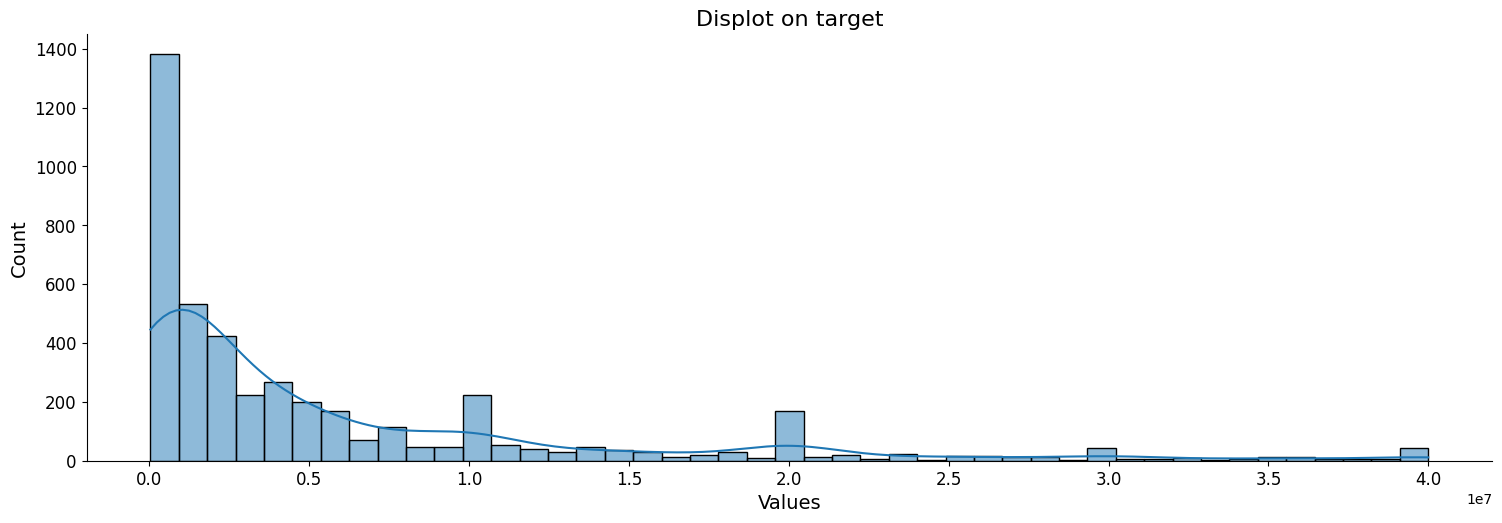

In [8]:
# Plot a displot on target variable
sns.displot(x='target', data=value, kde=True, aspect=3)

# Add some cosmetics
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Values', size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label='Displot on target', size=16)

# Display the plot
plt.show()

**Observations**:

- This seems to be a highly skewed target variable.

- Let's take the **log** transform of it to check the distribution.

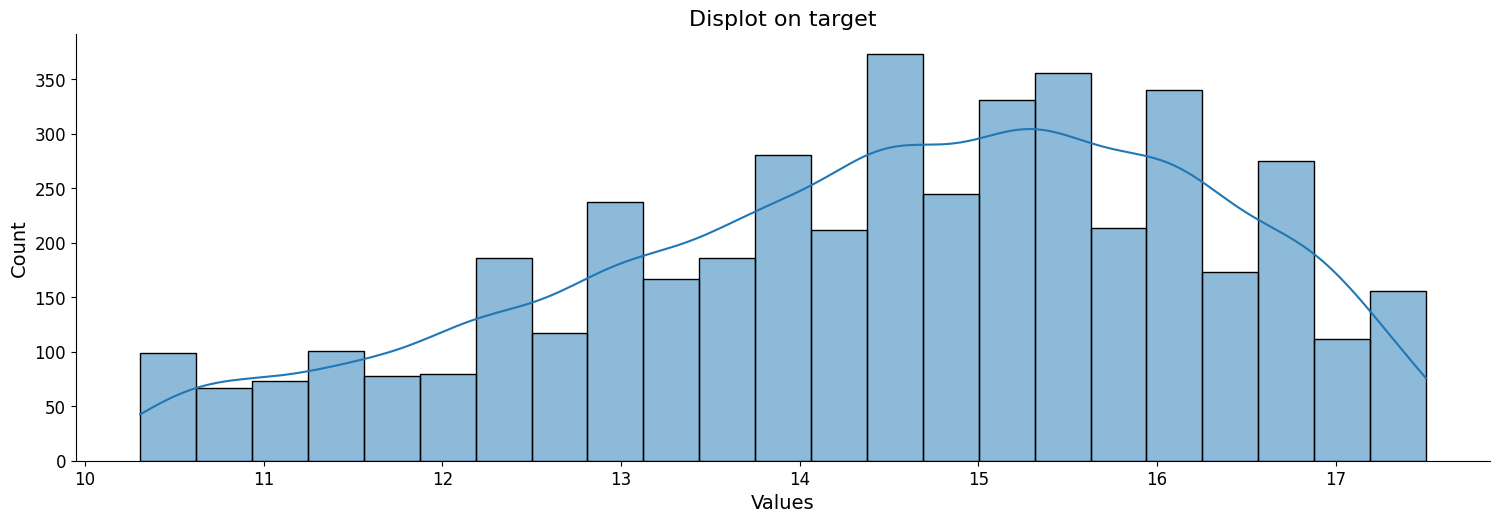

In [10]:
# Plot a displot on target variable
# np.log1p calculates the natural log(1 + x) of the value
sns.displot(x=np.log1p(value['target']), kde=True, aspect=3)

# Add some cosmetics
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Values', size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label='Displot on target', size=16)

# Display the plot
plt.show()

**Observations**:

- Better distributed now!

- Let's check the **information** for **target** feature after taking the log.

In [11]:
np.log1p(value['target']).describe()

count   4459.00000
mean      14.49024
std        1.75095
min       10.30899
25%       13.30469
50%       14.63088
75%       15.89495
max       17.50439
Name: target, dtype: float64

- This helps us **better understand** the distribution of the **target** feature.

- The min and max values are **10.3** and **17.5** respectively.

- The **average** value is now **14.49**.

- Data isn't skewed much and can be used for analysis

#### **Question**: What is the **spread** of the **target** feature with respect to a random **column** lets say **`48df886f9`**?

ValueError: ignored

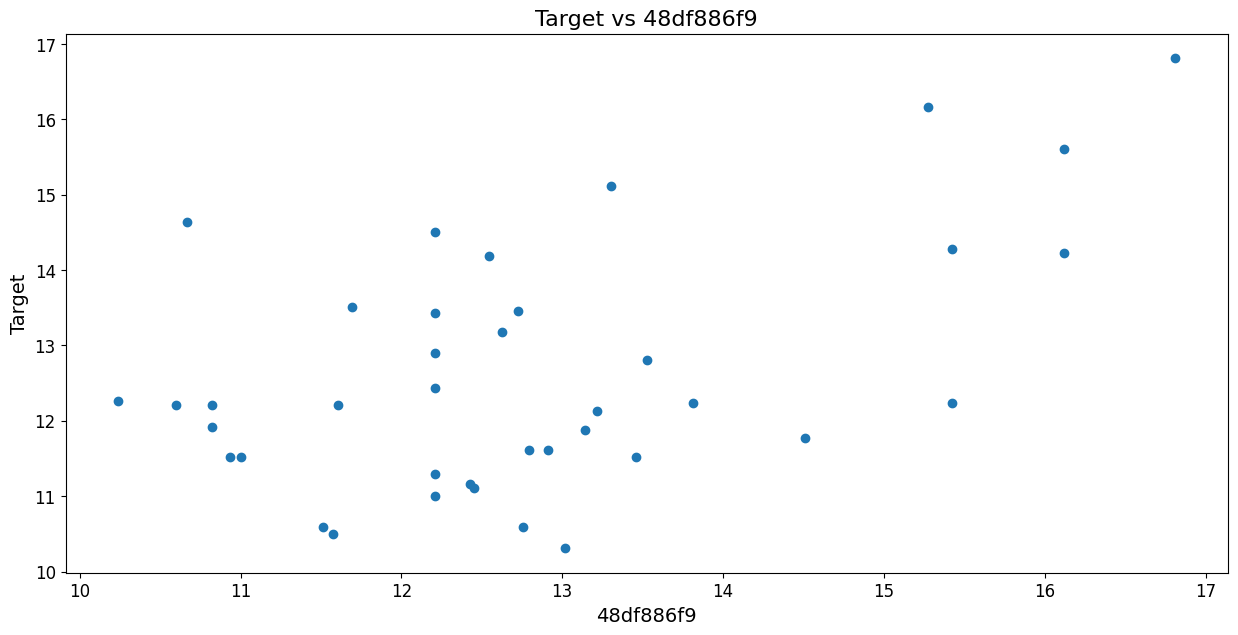

In [12]:
# Create a figure of 15 x 7 inches
fig = plt.figure(figsize=(15, 7))

# Plot a scatterplot between 48df886f9 and target
plt.scatter(x=np.log(value['48df886f9']), y=np.log(value['target']))

# Add cosmetics
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='48df886f9', size=14)
plt.ylabel(ylabel='Target', size=14)
plt.title(label='Target vs 48df886f9', size=16)
plt.grid(b=True)

# Display the output
plt.show()

#### **NOTE**:

- We are **limiting our analysis** till here because our aim is to **learn** the working of **PCA** with high number of features.

- If you would like to **explore further** go ahead and feel free to explore the features.

<a name = Section7></a>

---
# **7. Data Post Processing**
---

<a name = Section71></a>
### **7.1 Feature Scaling**

- Now we will **standardize** the columns of the dataframe using `StandardScaler`.

In [13]:
# Instantiating a standard scaler object
scaler = StandardScaler()

# Transforming our data
scaled_arr = scaler.fit_transform(value)

# Inputting our transformed data in a dataframe
scaled_frame = pd.DataFrame(data=scaled_arr, columns=value.columns)

# Getting a glimpse of transformed data
scaled_frame.head()

target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  2f0771a37  30347e683  \
0  3.89330   -0.03765   -0.02164   -0.04689   -0.01920   -0.01744   -0.05322   
1 -0.64918   -0.03765   -0.02164   -0.04689   -0.01920   -0.01744   -0.05322   
2  0.49252   -0.03765   -0.02164   -0.04689   -0.01920   -0.01744   -0.05322   
3 -0.47914   -0.03765   -0.02164   -0.04689   -0.01920   -0.01744   -0.05322   
4  1.02693   -0.03765   -0.02164   -0.04689   -0.01920   -0.01744   -0.05322   

   d08d1fbe3  6ee66e115  20aa07010  dc5a8f1d8  11d86fa6a  77c9823f2  \
0   -0.02245   -0.02485   -0.26739   -0.09777   -0.08137   -0.01498   
1   -0.02245   -0.02485   -0.03844   -0.09777   -0.08137   -0.01498   
2   -0.02245   -0.02485   -0.26739   -0.09777   -0.08137   -0.01498   
3   -0.02245   -0.02485   -0.26739   -0.09777   -0.08137   -0.01498   
4   -0.02245   -0.02485   -0.05926   -0.09777   -0.08137   -0.01498   

   8d6c2a0b2  4681de4fd  adf119b9a  cff75dd09  96f83a237  b8a716ebf  \
0   -0.02888   -0.14548   -0.08858   -0.05637   -0.03287   -0.12258   
1   -0.02888   -0.14548   -0.08858   -0.05637   -0.03287   -0.12258   
2   -0.02888   -0.14548   -0.08858   -0.05637   -0.03287   -0.12258   
3   -0.02888   -0.14548   -0.08858   -0.05637   -0.03287   -0.12258   
4   -0.02888   -0.14548   -0.08858   -0.05637   -0.03287   -0.12258   

   6c7a4567c  4fcfd2b4d  f3b9c0b95  71cebf11c  d966ac62c  68b647452  \
0   -0.05054   -0.06967   -0.07039   -0.02807   -0.06384   -0.09717   
1   -0.05054   -0.06967   -0.07039   -0.02807   -0.06384   -0.09717   
2   -0.05054   -0.06967   -0.07039   -0.02807   -0.06384   -0.09717   
3   -0.05054   -0.06967   -0.07039   -0.02807   -0.06384   -0.09717   
4   -0.05054   -0.06967   -0.07039   -0.02807   -0.06384   -0.09717   

   c88d108c9  ff7b471cd  0d866c3d7  bc3f77679  bd8f989f1  0eff5bf95  \
0   -0.04180   -0.02571   -0.10655   -0.02470   -0.19546   -0.02673   
1   -0.04180   -0.02571   -0.10655   -0.02470   -0.19546   -0.02673   
2   -0.04180   -0.02571   -0.10655   -0.02470   -0.19546   -0.02673   
3   -0.04180   -0.02571   -0.10655   -0.02470   -0.19546   -0.02673   
4   -0.04180   -0.02571   -0.10655   -0.02470   -0.19546   -0.02673   

   22ed6dba3  92b13ebba  233c7c17c  2cb4d123e  87ffda550  822e49b95  \
0   -0.19099   -0.13110   -0.10926   -0.09053    0.00685   -0.14793   
1   -0.19099   -0.13110   -0.10926   -0.09053   -0.16977   -0.14793   
2   -0.19099   -0.13110   -0.10926   -0.09053   -0.16977   -0.14793   
3   -0.19099   -0.13110   -0.10926   -0.09053   -0.16977   -0.14793   
4   -0.19099   -0.13110   -0.10926   -0.09053   -0.16977   -0.14793   

   316b978cd  d04e16aed  5d5c5ce6d  ec863cb52  11ad148bd  ea18d720e  \
0   -0.06420   -0.13426   -0.06081   -0.03454   -0.07245   -0.05898   
1   -0.06420   -0.13426   -0.06081   -0.03454   -0.07245   -0.05898   
2   -0.06420   -0.13426   -0.06081   -0.03454   -0.07245   -0.05898   
3   -0.06420   -0.13426   -0.06081   -0.03454   -0.07245   -0.05898   
4   -0.06420   -0.13426   -0.06081   -0.03454   -0.07245   -0.05898   

   408d86ce9  69d8b4020  b0868a049  80b14398e  ecdef52b2  c36bcacc5  \
0   -0.09976   -0.05401   -0.05250   -0.13700   -0.07379   -0.01506   
1   -0.09976   -0.05401   -0.05250   -0.13700   -0.07379   -0.01506   
2   -0.09976   -0.05401   -0.05250   -0.13700   -0.07379   -0.01506   
3   -0.09976   -0.05401   -0.05250   -0.13700   -0.07379   -0.01506   
4   -0.09976   -0.05401   -0.05250   -0.13700   -0.07379   -0.01506   

   151d318cd  ab0cddb90  2d6bd8275  dfdf4b580  c87722678  a8c320153  \
0   -0.04865   -0.03281   -0.10308   -0.07601   -0.02126   -0.03911   
1   -0.04865   -0.03281   -0.10308    7.43713   -0.02126   -0.03911   
2   -0.04865   -0.03281   -0.10308   -0.07601   -0.02126   -0.03911   
3   -0.04865   -0.03281   -0.10308   -0.07601   -0.02126   -0.03911   
4   -0.04865   -0.03281   -0.10308   -0.07601   -0.02126   -0.03911   

   a04684f1f  fa977f17b  feed9d437  645b47cde  7298ca1ef  d80abf8bc  \
0   -0.05408   -0.03187   -0.12426  

<a name = Section72></a>
### **7.2 Data Splitting**

- Now we will split our data into train set and test set.

- We will keep **80%** data in the **train** set, and **20%** data in the **test** set.

In [14]:
X = scaled_frame.drop(labels=['target'], axis=1)
y = scaled_frame['target']

In [15]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (3567, 4735)
y_train shape:  (3567,)
X_test shape:  (892, 4735)
y_test shape:  (892,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

<a name = Section81></a>
### **8.1 Model Development & Evaluation without PCA**

In [16]:
clfs = [LinearRegression(), RandomForestRegressor(random_state=42)]

for clf in clfs:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculate start time
  start_time = time.time()

  # Train the model
  clf.fit(X_train, y_train)

  # Make predictions on the trained model
  predictions = clf.predict(X_test)

  # Estimating the model performance
  RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
  R_squared = metrics.r2_score(y_test, predictions)

  # Calculate evaluated time
  elapsed_time = (time.time() - start_time)

  # Display the metrics and time took to develop the model
  print('Performance Metrics of', model_name, ':')
  print('[RMSE]:', RMSE, '[R-Squared]:', R_squared, '[Processing Time]:', elapsed_time, 'seconds')
  print('----------------------------------------\n')

Performance Metrics of LinearRegression :
[RMSE]: 6034273643.554973 [R-Squared]: -4.352625501770715e+19 [Processing Time]: 18.126726150512695 seconds
----------------------------------------

Performance Metrics of RandomForestRegressor :
[RMSE]: 0.8100917668122505 [R-Squared]: 0.21554192589511478 [Processing Time]: 466.71609568595886 seconds
----------------------------------------



**Observations**:

- It took **35 secs** to fit the data on linear regression model.

- Our linear regression model is giving weird **RMSE** & **R-squared** scores.

- The random forest model took **8 mins 57 secs** to train.

- Our random forest model is giving an **RMSE** score of **0.80** & **R-squared** of **0.22**.

- The time values are obtained after running the code on Google Colab and might vary from system to system.

<a name = Section82></a>

### **8.2. Dimensionality Reduction using PCA**

- Since there are a **lot of features used** to fit the model, it becomes a **tedious** task for the model to **assess every feature**.

- We will use the **dimensionality reduction** technique - **Principle Component Analysis**.

- PCA will **reduce** the number of **features** used to fit the model.

- We will directly **perform PCA** on our **already standardized features** stored in **X**.

- We are aiming to **retain 80%** of the **variance** from the data.

**Variance Graph**:

- We will plot the variance graph to show the **proportion** of **variance explained** with respect to the **number of features**.

- We are using **`pca.explained_variance_ratio_`** to plot the explained variance of our PCA model.

In [17]:
# Perform PCA on X (standardized features)
pca = PCA(n_components=0.80, random_state=0).fit(X_train)

# Calculate the explained variance
var = np.cumsum(np.round(a=pca.explained_variance_ratio_, decimals=3) * 100)

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Scatter(x=list(range(1000)),
                               y= var,
                               name="'Cumulative Explained Variance'",
                               mode='lines+markers'))

# Update the layout with some cosmetics
fig.update_layout(height=500,
                  width=1000,
                  title_text='PCA Analysis',
                  title_x=0.5,
                  xaxis_title='Number of components',
                  yaxis_title='Explained Variance %')

# Display the figure
fig.show()

**Observations**:

- We can see that the variance **does not increase** significantly after a certain number of components (**around 600**)

- The first **561 Principal Components** attribute for about **80% variation** in the data.

- We shall use these **561 components** for our **model building**.

- Building a **new** PCA model with `n_components` equal to **561**.

- This will allow our model to only use the **first 561 Principal Components** only.

- We are then transforming the dataset using our PCA model.

In [18]:
pca = PCA(n_components=561, random_state=0)

X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

# Printing shape of X_train and X_test
print('Shape of X_train: ', X_pca_train.shape)
print('Shape of X_test: ', X_pca_test.shape)

Shape of X_train:  (3567, 561)
Shape of X_test:  (892, 561)


- Our data now has **561 features** instead of **4900+ features**.

<a name = Section83></a>
### **8.3 Model Development & Evaluation with PCA**

In [19]:
clfs = [LinearRegression(), RandomForestRegressor(random_state=42)]

for clf in clfs:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculate start time
  start_time = time.time()

  # Train the model
  clf.fit(X_pca_train, y_train)

  # Make predictions on the trained model
  predictions = clf.predict(X_pca_test)

  # Estimating the model performance
  RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
  R_squared = metrics.r2_score(y_test, predictions)

  # Calculate evaluated time
  elapsed_time = (time.time() - start_time)

  # Display the metrics and time took to develop the model
  print('Performance Metrics of', model_name, ':')
  print('[RMSE]:', RMSE, '[R-Squared]:', R_squared, '[Processing Time]:', elapsed_time, 'seconds')
  print('----------------------------------------\n')

Performance Metrics of LinearRegression :
[RMSE]: 0.8299825746486984 [R-Squared]: 0.176546177764354 [Processing Time]: 0.2074878215789795 seconds
----------------------------------------

Performance Metrics of RandomForestRegressor :
[RMSE]: 0.7876404345313059 [R-Squared]: 0.2584211982007335 [Processing Time]: 152.2298448085785 seconds
----------------------------------------



**Observations**:

- It took **0.30 secs** to fit the data on linear regression model.

- Our linear regression model is giving an **RMSE** of **0.83** & **R-squared** score of **0.17**.

- The random forest model took **2 mins 55 secs** to train.

- Our random forest model is giving an **RMSE** score of **0.79** & **R-squared** score of **0.25**.

- But, such **scores** are to be **expected** since we are only using **561 features** from our dataset.

- Yet we can achieve **comparable results** in less time.

- The time values are obtained after running the code on Google Colab and might vary from system to system.

#### **NOTE**:

- We are **not scaling** back the **target variable** to it's original scale here.

- Our goal was to **learn** how applying **PCA** to our data before training **affects** the performance and execution time of **models**.

- The **goal is achieved**.

<a name = Section84></a>
### **8.4 Difference between the models**

|#|Model Name|RMSE|R-Squared|Execution Time|
|:--:|:--:|:--:|:--:|:--:|
|1|Linear Regression without PCA|5116066187.62|-3.128e+19|33 secs|
|2|Random Forest without PCA|0.80|0.22|8 min 54 secs|
|3|Linear Regression with PCA|0.83|0.17|0.30 secs|
|4|Random Forest with PCA|0.79|0.25|2 min 55 secs|

- Applying PCA on the dataset amounts to **99% faster** training for the linear regression model.

- The second random forest model is about **67% faster** to train than the first model.

- The models are trained significantly **faster** with **less performance compromise** than the models trained before performing PCA.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We studied in depth about **PCA** and its usage.

- We also learned about how to use PCA on a dataset.

- Without PCA, it took **longer** to train our ML models.

- But after applying PCA to the dataset, our models trained much **faster**.

- And, we were able to **achieve similar scores** on the test set even after using about **561 Principal Components**.